In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Informações sobre o dataset

Esse dataset foi construído a partir de informações em anúncios de venda de veículos disponíveis online, entre os dias 30/06/2022 e 04/07/2022. Na obtenção dos dados, foram procurados apenas anúncios profissionais de veículos com ano de fabricação a partir de 2000. Além disso, foi verificado no portal de vendas uma quantidade aproximadamente igual de anúncios entre as seguintes faixas de quilometragem: 0-30, 30-60, 60-100, 100+. Sendo assim, de forma a tornar a amostragem realizada mais representativa, os valores de quilometragem nesse dataset seguem uma proporção parecida.

In [2]:
df = pd.read_csv('cars_data.csv')

df.head()

,Marca,Modelo,Tipo de veículo,Ano,Estado,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,...,Ar condicionado,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,True,True,True,NaN,True,True,True,True,NaN,R$ 139.800
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,True,True,True,NaN,NaN,NaN,R$ 49.900
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,NaN,True,True,True,True,True,NaN,NaN,R$ 47.900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5331 entries, 0 to 5330
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marca              5326 non-null   object 
 1   Modelo             5331 non-null   object 
 2   Tipo de veículo    4390 non-null   object 
 3   Ano                5331 non-null   int64  
 4   Estado             5331 non-null   object 
 5   Quilometragem      5331 non-null   int64  
 6   Potência do motor  4071 non-null   object 
 7   Combustível        5274 non-null   object 
 8   Câmbio             5296 non-null   object 
 9   Direção            4200 non-null   object 
 10  Cor                4427 non-null   object 
 11  Final de placa     4508 non-null   float64
 12  Portas             5170 non-null   object 
 13  Único dono         3023 non-null   object 
 14  Aceita trocas      3456 non-null   object 
 15  Ar condicionado    4580 non-null   object 
 16  Air bag            3871 

# Verificando a consistência dos dados

## Marca

In [4]:
df['Marca'].describe()

count                5326
unique                 40
top       VW - VOLKSWAGEN
freq                  864
Name: Marca, dtype: object

In [5]:
df['Marca'].unique()

array(['MITSUBISHI', 'ALFA ROMEO', 'JEEP', 'VW - VOLKSWAGEN', 'TOYOTA',
       'FIAT', 'HYUNDAI', 'FORD', 'CHERY', 'GM - CHEVROLET', 'HONDA',
       'RENAULT', 'EFFA', 'NISSAN', 'LAND ROVER', 'MERCEDES-BENZ',
       'PEUGEOT', 'JAC', 'CITROEN', nan, 'KIA MOTORS', 'JAGUAR',
       'TROLLER', 'BMW', 'MINI', 'BUGGY', 'RAM', 'ASTON MARTIN', 'AUDI',
       'ASIA MOTORS', 'VOLVO', 'LEXUS', 'PORSCHE', 'SUZUKI', 'LIFAN',
       'DODGE', 'IVECO', 'SUBARU', 'SMART', 'CHRYSLER', 'SSANGYONG'],
      dtype=object)

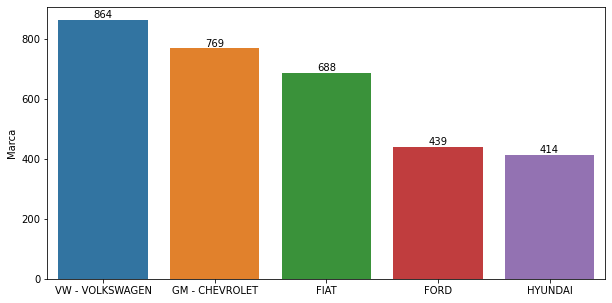

In [6]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Marca'].value_counts()[:5].index, y=df['Marca'].value_counts()[:5])

for i in ax.containers:
    ax.bar_label(i,)

As marcas de veículo mais frequentes no dataset podem ser vistas acima. Os valores de marcas parecem coesos, exceto pela presença de valores faltantes (apenas 5 observações). 

**D:** Faz sentido manter observações de veículos com valores faltantes para a marca?

## Modelo

In [7]:
df['Modelo'].head()

0    MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...
1              ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V
2        JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.
3    VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...
4                                         TOYOTA ETIOS
Name: Modelo, dtype: object

In [8]:
len(df['Modelo'].unique())

1570

Temos 1570 valores de modelos distintos. Como pode ser visto acima, o campo analisado está mais coerente com uma descrição do veículo. Para tentar reduzir a variância dos dados, tentaremos pegar apenas a informação do modelo, disponibilizada após a marca do mesmo.

In [9]:
df['ModeloLimpo'] = df.apply(lambda x: x.Modelo.replace(str(x.Marca), '').split(' ')[1], axis=1)

df['ModeloLimpo'].head()

0       L200
1        156
2    COMPASS
3    SAVEIRO
4      ETIOS
Name: ModeloLimpo, dtype: object

In [10]:
len(df['ModeloLimpo'].unique())

314

Agora, vamos renomear as colunas do dataset para que sejam mais coerentes com seus valores.

In [11]:
df.rename({'Modelo':'Descricao', 'ModeloLimpo':'Modelo'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo de veículo,Ano,Estado,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,...,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,True,True,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,NaN,True,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS


In [12]:
df['Modelo'].describe()

count     5331
unique     314
top       ONIX
freq       161
Name: Modelo, dtype: object

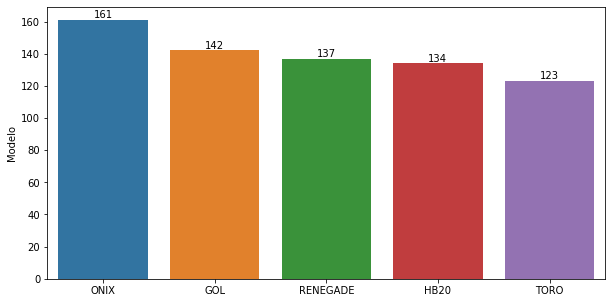

In [13]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Modelo'].value_counts()[:5].index, y=df['Modelo'].value_counts()[:5])

for i in ax.containers:
    ax.bar_label(i,)

Mesmo após a limpeza dos dados, ainda temos uma gama muito grande de modelos. Uma ideia para a etapa de modelagem seria a utilização de um target encoder, onde o valor do modelo é substituído pela média dos valores da target (o preço do veículo) para o modelo em questão.

## Tipo de veículo

In [14]:
df['Tipo de veículo'].describe()

count        4390
unique          9
top       Passeio
freq         1308
Name: Tipo de veículo, dtype: object

In [15]:
df['Tipo de veículo'].value_counts()

Passeio           1308
Hatch             1033
Sedã               753
SUV                741
Pick-up            428
Van/Utilitário     118
Conversível          5
Caminhão Leve        3
Buggy                1
Name: Tipo de veículo, dtype: int64

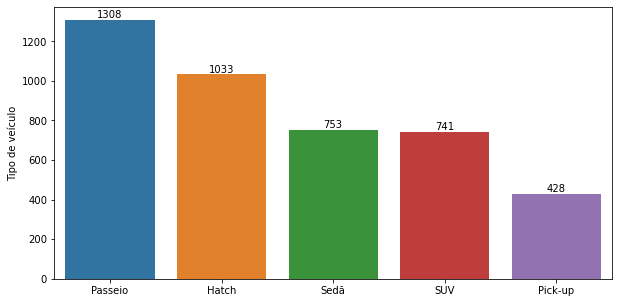

In [16]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Tipo de veículo'].value_counts()[:5].index, y=df['Tipo de veículo'].value_counts()[:5])

for i in ax.containers:
    ax.bar_label(i,)

Temos 9 categorias diferentes de tipo de veículo, mas 3 delas são muito pouco representativas (Conversível, Caminhão Leve e Buggy). Temos um número alto de valores faltantes nessa feature, igual a 941 ou aproximadamente 18% das observações do dataset.

**D:** O que fazer com esses valores faltantes?

**D:** Quais os tipos de carro classificados como Passeio?

**D:** Vamos dropar as classes pouco representativas?

A coluna será renomeada, de forma a facilitar sua manipulação dentro da biblioteca Pandas.

In [17]:
df.rename({'Tipo de veículo':'Tipo'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo,Ano,Estado,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,...,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,True,True,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,NaN,True,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS


## Ano

In [18]:
df['Ano'].describe()

count    5331.000000
mean     2016.727818
std         4.050388
min      2000.000000
25%      2014.000000
50%      2018.000000
75%      2020.000000
max      2023.000000
Name: Ano, dtype: float64

In [19]:
df['Ano'].unique()

array([2023, 2012, 2017, 2014, 2015, 2019, 2021, 2022, 2018, 2016, 2013,
       2011, 2020, 2008, 2003, 2010, 2009, 2005, 2007, 2006, 2004, 2002,
       2000, 2001], dtype=int64)

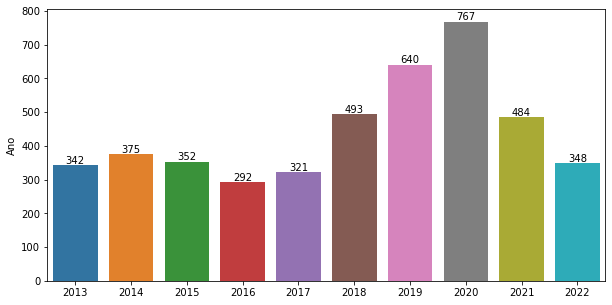

In [20]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Ano'].value_counts()[:10].index, y=df['Ano'].value_counts()[:10])

for i in ax.containers:
    ax.bar_label(i,)

A maior parte dos veículos anunciados é do ano de 2020 (767 automóveis), seguido pelo ano de 2019 (640 automóveis) e pelos anos de 2018 (493 automóveis) e 2021 (484 automóveis).

## Estado

In [21]:
df['Estado'].describe()

count     5331
unique      27
top         SP
freq      1364
Name: Estado, dtype: object

In [22]:
df['Estado'].unique()

array(['RJ', 'AM', 'DF', 'RS', 'PA', 'PR', 'CE', 'SP', 'RO', 'MG', 'PB',
       'ES', 'GO', 'SC', 'BA', 'PE', 'MA', 'RN', 'SE', 'AL', 'MS', 'MT',
       'TO', 'RR', 'AC', 'PI', 'AP'], dtype=object)

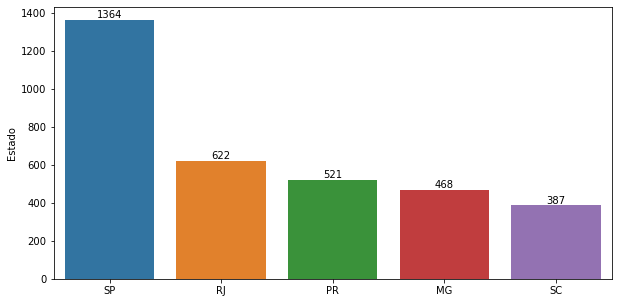

In [23]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Estado'].value_counts()[:5].index, y=df['Estado'].value_counts()[:5])

for i in ax.containers:
    ax.bar_label(i,)

Nessa etapa será modificado o nome da feature, para que seu significado não seja interpretado errôneamente. A feature representa a unidade federal do veículo, e não o estado de conservação do mesmo.

In [24]:
df.rename({'Estado':'UF'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,...,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,True,True,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,NaN,True,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS


## Quilometragem

In [25]:
df['Quilometragem'].describe()

count    5.331000e+03
mean     1.998521e+06
std      1.369719e+08
min      0.000000e+00
25%      2.981700e+04
50%      5.977000e+04
75%      1.000000e+05
max      1.000000e+10
Name: Quilometragem, dtype: float64

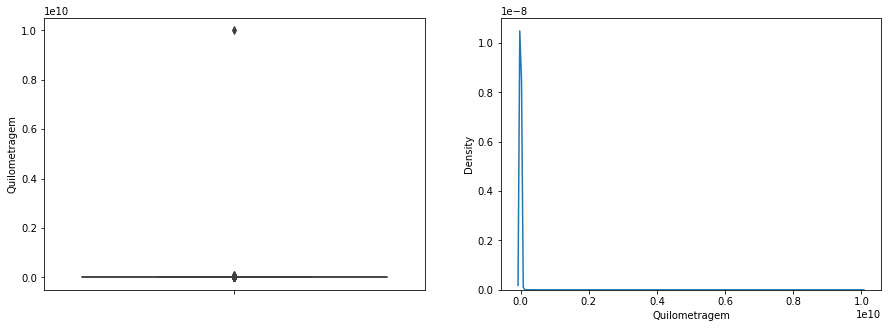

In [26]:
fig, axes = plt.subplot_mosaic([['left', 'right']], figsize=(15,5))

sns.boxplot(y=df['Quilometragem'], ax=axes['left']);
sns.kdeplot(x=df['Quilometragem'], ax=axes['right']);

Aparentemente, temos um outlier muito forte em aproximadamente 10.000.000.000 km. Esse número é nitidamente muito extremo e, portanto, deve ser fruto de algum erro de anotação.

**D**: Como tratar os outliers? 

Através de pesquisas, foi visto que motoristas profissionais (taxistas, ubers) rodam até 350 km por dia. Para o caso extremo em que esses motoristas trabalhem todos os dias, teríamos 127.750 km por ano. Sendo assim, uma forma de calcular um limite de quilometragem realista seria multiplicar 350 km pelo número de dias decorridos entre a data de obtenção dos dados (aproximadamente dia 04/07/2022) e a data mínima de aquisição do modelo. Se o modelo do carro é do ano 2019, vamos considerar que a data mínima para sua aquisição foi dia 01/07/2018.

In [27]:
data_coleta = '04/07/2022'
data_coleta = datetime.strptime(data_coleta, '%d/%m/%Y')

df['Dias'] = df.apply(lambda x: (data_coleta - datetime.strptime(f'01/07/{x.Ano-1}', '%d/%m/%Y')).days, axis=1)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,...,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,True,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925


In [28]:
df['Dias'].describe()

count    5331.000000
mean     2293.798162
std      1479.403110
min         3.000000
25%      1099.000000
50%      1829.000000
75%      3290.000000
max      8404.000000
Name: Dias, dtype: float64

In [29]:
max_km_dia = 350

df['KmLimite'] = df['Dias']*max_km_dia

df.head()

,Marca,Descricao,Tipo,Ano,UF,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,...,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


In [30]:
len(df.loc[df['Quilometragem']>df['KmLimite']])

22

O dataset contêm, portanto, 22 observações em que a quilometragem observada é maior do que a limite definida. Abaixo podemos visualizar o dataset sem a presença desses dados:

In [31]:
df.loc[df['Quilometragem']<=df['KmLimite']]['Quilometragem'].describe()

count       5309.000000
mean       69467.433792
std        61467.340835
min            0.000000
25%        29724.000000
50%        59400.000000
75%        99856.000000
max      1000000.000000
Name: Quilometragem, dtype: float64

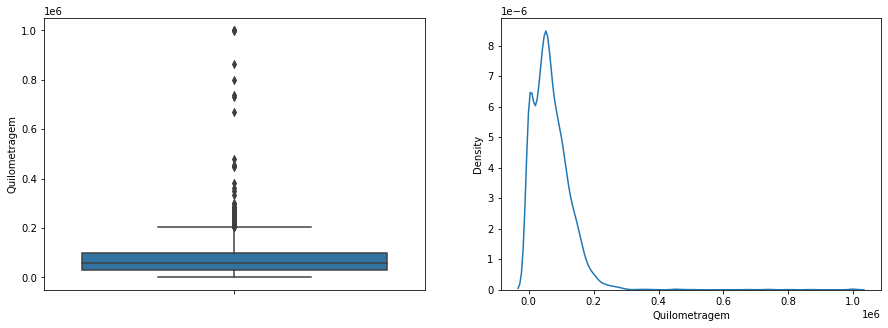

In [32]:
fig, axes = plt.subplot_mosaic([['left', 'right']], figsize=(15,5))

sns.boxplot(y=df.loc[df['Quilometragem']<=df['KmLimite']]['Quilometragem'], ax=axes['left']);
sns.kdeplot(x=df.loc[df['Quilometragem']<=df['KmLimite']]['Quilometragem'], ax=axes['right']);

Abaixo, é possível visualizar o boxplot sem outliers.

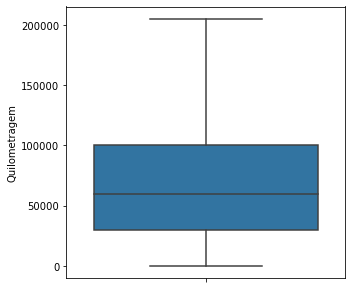

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df['Quilometragem'], showfliers=False);

**D**: O valor de quilometragem máxima de 1.000.000 é adequado? Podemos selecionar um valor ainda menor? Pelo método de Tukey temos que o valor máximo de quilometragem é igual a 205.274

In [34]:
IQR = df['Quilometragem'].quantile(.75)-df['Quilometragem'].quantile(.25)
Max_Km = 1.5*IQR + df['Quilometragem'].quantile(.75)

Max_Km

205274.5

In [35]:
len(df.loc[df['Quilometragem']>=205361])

113

Para o nosso dataset, teríamos 113 observações de quilometragem classificadas como outliers.

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [36]:
df.rename({'Quilometragem':'Km'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potência do motor,Combustível,Câmbio,Direção,...,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Potência do motor

In [37]:
df['Potência do motor'].describe()

count     4071
unique      12
top        1.0
freq      1039
Name: Potência do motor, dtype: object

In [38]:
df['Potência do motor'].unique()

array(['2.0 - 2.9', nan, '1.6', '1.5', '1.0', '1.8', '3.0 - 3.9', '1.3',
       '1.4', '1.2', '1.9', '4.0 ou mais', '1.7'], dtype=object)

In [39]:
df['Potência do motor'].value_counts()

1.0            1039
2.0 - 2.9       957
1.6             776
1.8             402
1.4             387
1.5             212
3.0 - 3.9       159
1.3              93
1.2              20
4.0 ou mais      18
1.9               4
1.7               4
Name: Potência do motor, dtype: int64

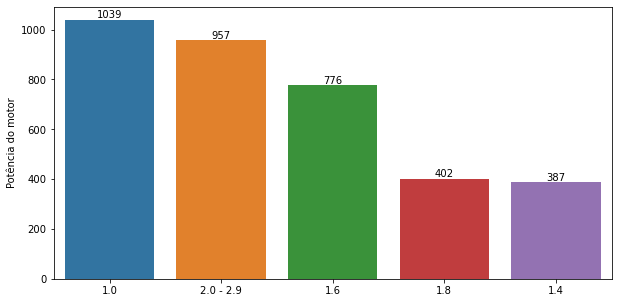

In [40]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Potência do motor'].value_counts()[:5].index, y=df['Potência do motor'].value_counts()[:5])

for i in ax.containers:
    ax.bar_label(i,)

**D:** O que fazer com o grande volume de valores faltantes?

**D:** Seria possível agrupar em outras categorias (Exemplo: 1.0, 1.1 - 1.5, 1.6 - 1.9, 2.0+)?

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [41]:
df.rename({'Potência do motor':'Potencia'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustível,Câmbio,Direção,...,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Combustível

In [42]:
df['Combustível'].describe()

count     5274
unique       7
top       Flex
freq      4091
Name: Combustível, dtype: object

In [43]:
df['Combustível'].unique()

array(['Diesel', nan, 'Flex', 'Gasolina', 'Elétrico', 'Álcool',
       'Gás Natural', 'Híbrido'], dtype=object)

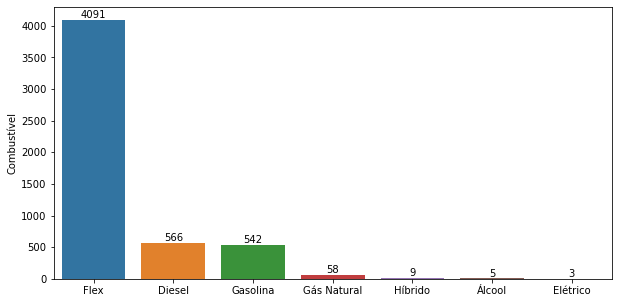

In [44]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Combustível'].value_counts().index, y=df['Combustível'].value_counts())

for i in ax.containers:
    ax.bar_label(i,)

Temos 71 valores faltantes, que poderiam ser substituídos pela categoria amplamente mais presente nessa feature: Flex.

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [45]:
df.rename({'Combustível':'Combustivel'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Câmbio,Direção,...,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Câmbio

In [46]:
df['Câmbio'].describe()

count           5296
unique             3
top       Automático
freq            2832
Name: Câmbio, dtype: object

In [47]:
df['Câmbio'].unique()

array(['Automático', nan, 'Manual', 'Semi-Automático'], dtype=object)

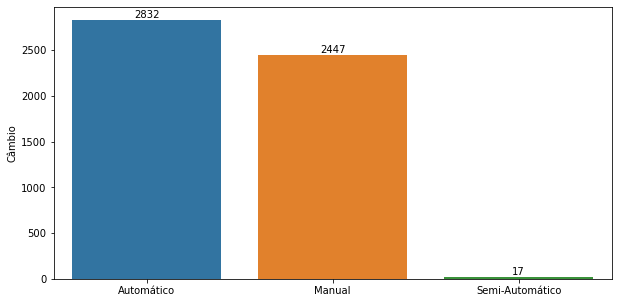

In [48]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Câmbio'].value_counts().index, y=df['Câmbio'].value_counts())

for i in ax.containers:
    ax.bar_label(i,)

**D**: O que fazer com os poucos valores faltantes?

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [49]:
df.rename({'Câmbio':'Cambio'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direção,...,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Direção

In [50]:
df['Direção'].describe()

count           4200
unique             4
top       Hidráulica
freq            2544
Name: Direção, dtype: object

In [51]:
df['Direção'].unique()

array(['Hidráulica', nan, 'Elétrica', 'Mecânica', 'Assistida'],
      dtype=object)

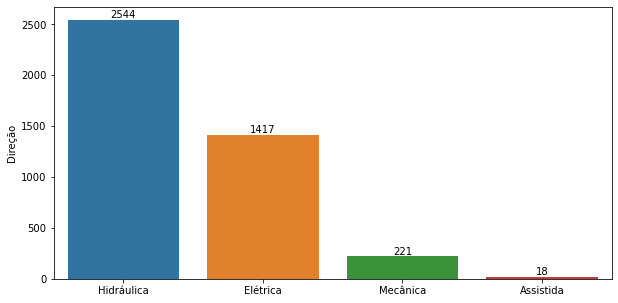

In [52]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Direção'].value_counts().index, y=df['Direção'].value_counts())

for i in ax.containers:
    ax.bar_label(i,)

**D:** O que fazer com o grande volume de valores faltantes?

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [53]:
df.rename({'Direção':'Direcao'}, axis=1, inplace=True)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,MITSUBISHI,MITSUBISHI L200 TRITON SPORT HPE 2.4 CD DIESEL...,Pick-up,2023,RJ,0,2.0 - 2.9,Diesel,Automático,Hidráulica,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Cor

In [54]:
df['Cor'].describe()

count       4427
unique        10
top       Branco
freq        1457
Name: Cor, dtype: object

In [55]:
df['Cor'].unique()

array(['Amarelo', nan, 'Branco', 'Prata', 'Preto', 'Cinza', 'Vermelho',
       'Azul', 'Outra', 'Laranja', 'Verde'], dtype=object)

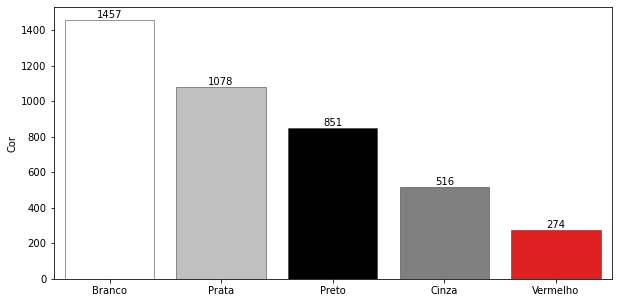

In [56]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Cor'].value_counts().index[:5], y=df['Cor'].value_counts()[:5], linewidth=0.5, edgecolor=".2",
                 palette=['white', 'silver', 'black', 'grey', 'red'])

for i in ax.containers:
    ax.bar_label(i,)

**D**: O que fazer com o grande volume de valores faltantes?

## Final de placa

In [57]:
df['Final de placa'].describe()

count    4508.000000
mean        4.331854
std         3.021906
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: Final de placa, dtype: float64

In [58]:
df['Final de placa'].unique()

array([ 1., nan,  0.,  9.,  3.,  5.,  7.,  8.,  6.,  2.,  4.])

A feature será convertida para o formato inteiro, mas antes é necessário tratar os valores faltantes.

**D**: O que fazer com o grande volume de valores faltantes?

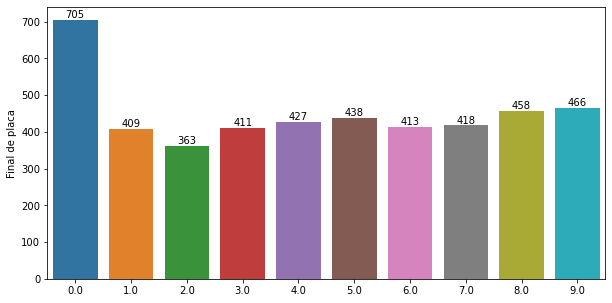

In [59]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Final de placa'].value_counts().index, y=df['Final de placa'].value_counts())

for i in ax.containers:
    ax.bar_label(i,)

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [60]:
df.rename({'Final de placa':'FinalDePlaca'}, axis=1, inplace=True)

df.iloc[:,11:].head()

,FinalDePlaca,Portas,Único dono,Aceita trocas,Ar condicionado,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,1.0,4 portas,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,0.0,NaN,NaN,Sim,True,True,True,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,9.0,2 portas,Não,Sim,True,True,True,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,3.0,NaN,NaN,Sim,True,NaN,True,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Portas

In [61]:
df['Portas'].describe()

count         5170
unique           2
top       4 portas
freq          4829
Name: Portas, dtype: object

In [62]:
df['Portas'].unique()

array(['4 portas', nan, '2 portas'], dtype=object)

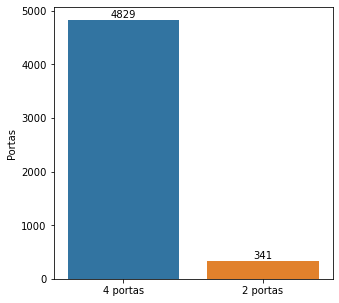

In [63]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=df['Portas'].value_counts().index, y=df['Portas'].value_counts())

for i in ax.containers:
    ax.bar_label(i,)

Temos 176 valores faltantes, que poderiam ser substituídos pela categoria amplamente mais presente nessa feature: 4 portas.

É preciso tratar esses valores faltantes para então converter o valor para inteiro, através do código comentado abaixo.

In [64]:
#df['Portas'] = df['Portas'].astype(str).apply(lambda x: int(x.split(' ')[0]))

## Único dono

In [65]:
df['Único dono'].describe()

count     3023
unique       2
top        Não
freq      1584
Name: Único dono, dtype: object

In [66]:
df['Único dono'].unique()

array([nan, 'Não', 'Sim'], dtype=object)

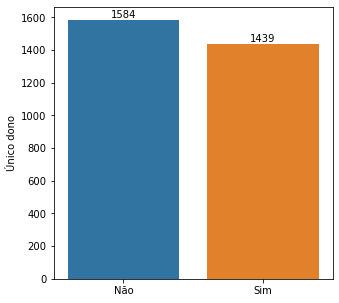

In [67]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=df['Único dono'].value_counts().index, y=df['Único dono'].value_counts())

for i in ax.containers:
    ax.bar_label(i,)

**D**: O que fazer com os valores faltantes? Criar um campo chamado "Não informado"?

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [68]:
df.rename({'Único dono':'UnicoDono'}, axis=1, inplace=True)

df.iloc[:,11:].head()

,FinalDePlaca,Portas,UnicoDono,Aceita trocas,Ar condicionado,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,1.0,4 portas,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,0.0,NaN,NaN,Sim,True,True,True,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,9.0,2 portas,Não,Sim,True,True,True,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,3.0,NaN,NaN,Sim,True,NaN,True,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Aceita trocas

In [69]:
df['Aceita trocas'].describe()

count     3456
unique       2
top        Sim
freq      3288
Name: Aceita trocas, dtype: object

In [70]:
df['Aceita trocas'].unique()

array(['Sim', nan, 'Não'], dtype=object)

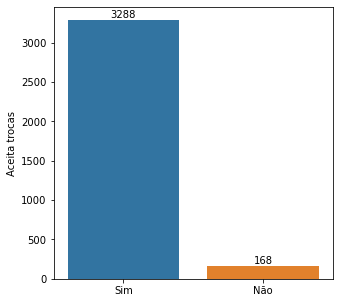

In [71]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=df['Aceita trocas'].value_counts().index, y=df['Aceita trocas'].value_counts())

for i in ax.containers:
    ax.bar_label(i,)

**D**: O que fazer com os valores faltantes? Criar um campo chamado "Não informado"? Atribuí-los para a categoria predominante?

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [72]:
df.rename({'Aceita trocas':'AceitaTrocas'}, axis=1, inplace=True)

df.iloc[:,11:].head()

,FinalDePlaca,Portas,UnicoDono,AceitaTrocas,Ar condicionado,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado,Preço,Modelo,Dias,KmLimite
0,1.0,4 portas,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 0,L200,3,1050
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R$ 50.000,156,4021,1407350
2,0.0,NaN,NaN,Sim,True,True,True,NaN,True,True,True,True,NaN,R$ 139.800,COMPASS,2194,767900
3,9.0,2 portas,Não,Sim,True,True,True,True,True,True,NaN,NaN,NaN,R$ 49.900,SAVEIRO,3290,1151500
4,3.0,NaN,NaN,Sim,True,NaN,True,True,True,True,True,NaN,NaN,R$ 47.900,ETIOS,2925,1023750


## Opcionais

As features Ar condicionado, Air bag, Alarme, Trava elétrica, Vidro elétrico, Som, Sensor de ré, Câmera de ré e Blindado constituem items opcionais do veículo, que podem ou não ter sido informados por seus proprietários. Todos esses campos possuem apenas dois valores: Sim ou NaN, para o caso em que o item não foi informado.

In [73]:
opcionais = ['Ar condicionado', 'Air bag', 'Alarme', 'Trava elétrica', 'Vidro elétrico', 'Som', 
             'Sensor de ré', 'Câmera de ré', 'Blindado']

df[opcionais] = df[opcionais].fillna(False)

df[opcionais].head()

,Ar condicionado,Air bag,Alarme,Trava elétrica,Vidro elétrico,Som,Sensor de ré,Câmera de ré,Blindado
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,True,True,True,False,True,True,True,True,False
3,True,True,True,True,True,True,False,False,False
4,True,False,True,True,True,True,True,False,False


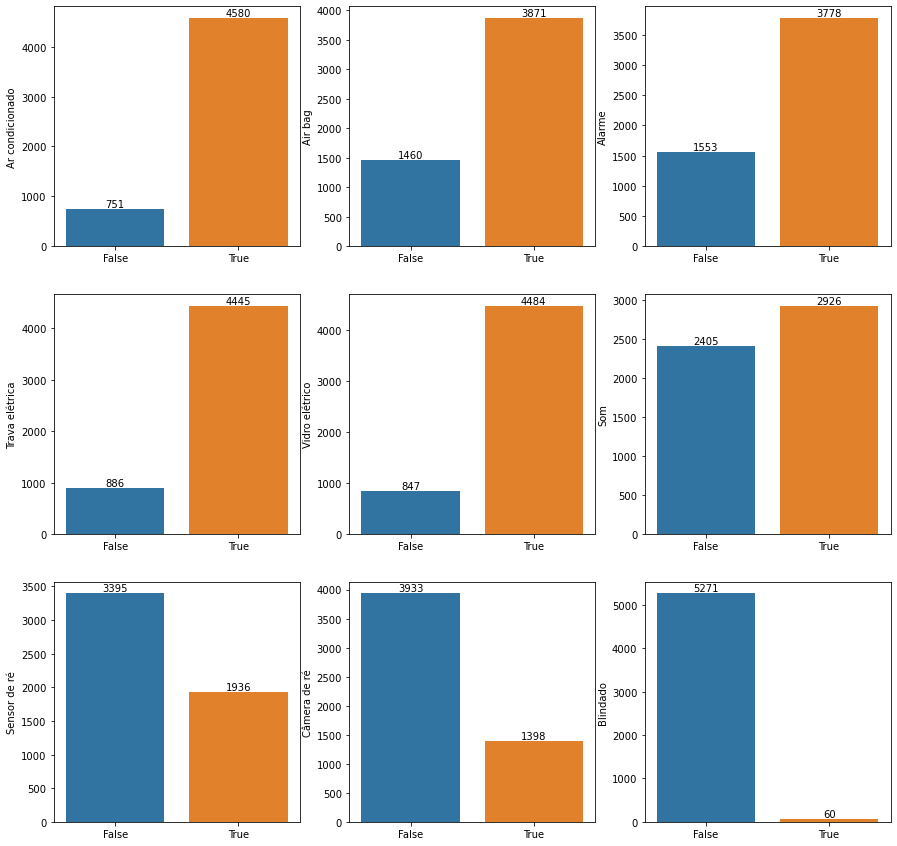

In [74]:
fig, axes = plt.subplot_mosaic([[opcionais[0], opcionais[1], opcionais[2]],
                                [opcionais[3], opcionais[4], opcionais[5]],
                                [opcionais[6], opcionais[7], opcionais[8]]], figsize=(15,15))

for i, op in enumerate(opcionais):
    ax = sns.barplot(x=df[op].value_counts().index, y=df[op].value_counts(), ax=axes[op]);
    for j in ax.containers:
        ax.bar_label(j,)

Por fim, o nome das features será renomeado para facilitar sua manipulação pela biblioteca Pandas.

In [75]:
df.rename({'Ar condicionado':'ArCondicionado', 'Air bag':'AirBag', 'Trava elétrica':'TravaEletrica',
           'Vidro elétrico':'VidroEletrico', 'Sensor de ré':'SensorDeRe', 'Câmera de ré':'CameraDeRe'},
          axis=1, inplace=True)

df.iloc[:,11:].head()

,FinalDePlaca,Portas,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,SensorDeRe,CameraDeRe,Blindado,Preço,Modelo,Dias,KmLimite
0,1.0,4 portas,NaN,Sim,False,False,False,False,False,False,False,False,False,R$ 0,L200,3,1050
1,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,R$ 50.000,156,4021,1407350
2,0.0,NaN,NaN,Sim,True,True,True,False,True,True,True,True,False,R$ 139.800,COMPASS,2194,767900
3,9.0,2 portas,Não,Sim,True,True,True,True,True,True,False,False,False,R$ 49.900,SAVEIRO,3290,1151500
4,3.0,NaN,NaN,Sim,True,False,True,True,True,True,True,False,False,R$ 47.900,ETIOS,2925,1023750


## Preço

In [76]:
df['Preço'].describe()

count          5235
unique         1474
top       R$ 59.900
freq             59
Name: Preço, dtype: object

Temos 96 valores faltantes para o preço. Por se tratar da variável mais importante do dataset, essas observações serão excluídas da base:

In [77]:
df = df.dropna(subset=['Preço']).reset_index(drop=True)

len(df)

5235

Em seguida, os valores de preço serão convertidos para o formato float, facilitando as análises:

In [78]:
df['Preço'] = df['Preço'].apply(lambda x: float(x.split(' ')[1].replace('.', '')))

df['Preço'].head()

0         0.0
1     50000.0
2    139800.0
3     49900.0
4     47900.0
Name: Preço, dtype: float64

In [79]:
df['Preço'].describe()

count    5.235000e+03
mean     9.025470e+04
std      7.400174e+04
min      0.000000e+00
25%      4.890000e+04
50%      7.190000e+04
75%      1.059400e+05
max      1.890000e+06
Name: Preço, dtype: float64

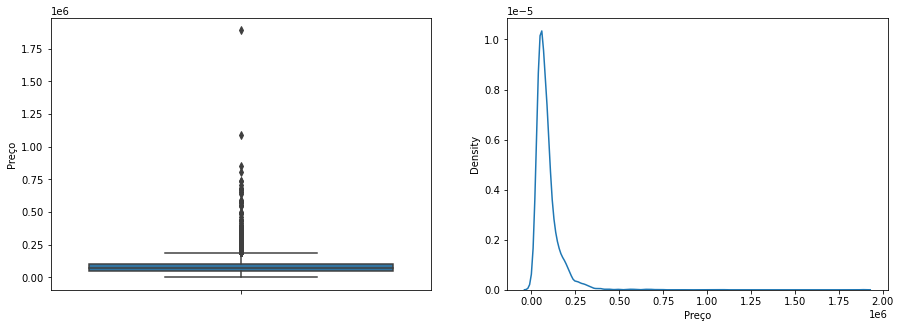

In [80]:
fig, axes = plt.subplot_mosaic([['left', 'right']], figsize=(15,5))

sns.boxplot(y=df['Preço'], ax=axes['left']);
sns.kdeplot(x=df['Preço'], ax=axes['right']);

In [81]:
len(df.loc[df['Preço']<=0])

23

Temos 23 colunas onde o preço do carro é igual a 0. Esse é obviamente um erro de anotação, e também deve ser desconsiderado do dataset.

In [82]:
df = df.drop(df.loc[df['Preço']<=0].index).reset_index(drop=True)

len(df)

5212

In [83]:
df['Preço'].describe()

count    5.212000e+03
mean     9.065298e+04
std      7.392101e+04
min      7.500000e+02
25%      4.949000e+04
50%      7.199000e+04
75%      1.062488e+05
max      1.890000e+06
Name: Preço, dtype: float64

Por fim, a feature será renomeada para facilitar sua manipulação pela biblioteca Pandas.

In [84]:
df.rename({'Preço':'Preco'}, axis=1, inplace=True)

df.iloc[:,11:].head()

,FinalDePlaca,Portas,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,SensorDeRe,CameraDeRe,Blindado,Preco,Modelo,Dias,KmLimite
0,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,50000.0,156,4021,1407350
1,0.0,NaN,NaN,Sim,True,True,True,False,True,True,True,True,False,139800.0,COMPASS,2194,767900
2,9.0,2 portas,Não,Sim,True,True,True,True,True,True,False,False,False,49900.0,SAVEIRO,3290,1151500
3,3.0,NaN,NaN,Sim,True,False,True,True,True,True,True,False,False,47900.0,ETIOS,2925,1023750
4,3.0,4 portas,NaN,NaN,True,True,True,True,True,False,True,False,False,98900.0,POLO,733,256550


## Dataframe após a verificação de consistência dos dados

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5207 non-null   object 
 1   Descricao       5212 non-null   object 
 2   Tipo            4288 non-null   object 
 3   Ano             5212 non-null   int64  
 4   UF              5212 non-null   object 
 5   Km              5212 non-null   int64  
 6   Potencia        3964 non-null   object 
 7   Combustivel     5162 non-null   object 
 8   Cambio          5183 non-null   object 
 9   Direcao         4094 non-null   object 
 10  Cor             4327 non-null   object 
 11  FinalDePlaca    4433 non-null   float64
 12  Portas          5067 non-null   object 
 13  UnicoDono       2962 non-null   object 
 14  AceitaTrocas    3357 non-null   object 
 15  ArCondicionado  5212 non-null   bool   
 16  AirBag          5212 non-null   bool   
 17  Alarme          5212 non-null   b

In [87]:
df.to_csv('cars_data_cleaned.csv', index=False)